In [1]:
"""
Ce TP présente ce qu’est une Descente de Gradient (DG). La DG s’applique lorsque
l’on cherche le minimum d’une fonction dont on connaît l’expression analytique, qui est
dérivable, mais dont le calcul direct du minimum est difficile. C’est un algorithme fonda-
mental à connaître car utilisé partout sous des formes dérivées. Nous n’étudions ici que la
version de base.
"""

'\nCe TP présente ce qu’est une Descente de Gradient (DG). La DG s’applique lorsque\nl’on cherche le minimum d’une fonction dont on connaît l’expression analytique, qui est\ndérivable, mais dont le calcul direct du minimum est difficile. C’est un algorithme fonda-\nmental à connaître car utilisé partout sous des formes dérivées. Nous n’étudions ici que la\nversion de base.\n'

In [2]:
#>Descente de gradient
!pip install sympy



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
import sympy as sp
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from scipy import stats
import numpy as np

In [4]:
#1. Calculez l’expression analytique de la fonction E(x) = (x − 1)(x − 2)(x − 3)(x − 5) et sa dérivée
# Expression analytique E(x) = E(x) = x^4 - 11x^3 + 41x^2 - 61x + 30
#E(x)  = x**4 - 11*x**3 + 41*x**2 - 61*x + 30
# La derivée
#E'(x) =  4*x**3 - 33*x**2 + 82*x - 61

In [5]:

# Définir la variable symbolique x
x = sp.symbols('x')

# Définir la fonction E(x)
E = x**4 - 11*x**3 + 41*x**2 - 61*x + 30

# Calculer la dérivée de E(x)
E_prime = sp.diff(E, x)

# Afficher E(x) et E'(x)
print("E(x) =", E)
print("E'(x) =", E_prime)

E(x) = x**4 - 11*x**3 + 41*x**2 - 61*x + 30
E'(x) = 4*x**3 - 33*x**2 + 82*x - 61


In [6]:
# 2. Implémentez l’algorithme DG sous Python pour la fonction E(x)

In [49]:
def deriv_E(x):
    return 4*x**3 - 33*x**2 + 82*x - 61



# Fonction de descente de gradient
def gradient_descente(learning_rate, max_iterations, tolerance,x0):
    x_values = [x0]  # Initialisation de la liste de valeurs de x
    it = 0
    erreurs = []
    while it < max_iterations-1:
        current_x = x_values[-1]
        gradient = deriv_E(current_x) # Calculer le gradient à l'emplacement actuel
        new_x = current_x - learning_rate * gradient  # Mettre à jour x en utilisant le gradient
        
        erreurs.append(new_x - current_x)
        # Vérifier la condition d'arrêt
        if abs(new_x - current_x) < tolerance:
            break
        
        x_values.append(new_x)
        it += 1
    
    return x_values,erreurs




        

In [50]:
#3. Pour comprendre ce que fait effectivement la DG, testez l’algorithme implémenté en utilisant des exemples d’exécutions avec des valeurs initiales de x0 et η suivantes :

In [51]:
#(a) x0 = 5 et η = 0.001
learning_rate = 0.001
max_iterations = 1000
tolerance = 0.01
x0 = 5

result_a,erreurs_a = gradient_descente(learning_rate, max_iterations, tolerance,x0)

# Imprimer les résultats
#print("Valeurs de x après la descente de gradient :", result)
print("\nNombre d'itérations :", len(result_a))
#print("\nles erreurs :",erreurs_a)

print("\nValeur de E(x) au minimum :",  result_a[-1])
print("\nValeur de E'(xmin)  :",  deriv_E(result_a[-1]))


Nombre d'itérations : 22

Valeur de E(x) au minimum : 4.671161102568805

Valeur de E'(xmin)  : 9.677786882487453


In [52]:
#(b) x0 = 5 et η = 0.01
learning_rate = 0.01
max_iterations = 1000
tolerance = 0.01
x0 = 5

result_b,erreurs_b = gradient_descente(learning_rate, max_iterations, tolerance,x0)

# Imprimer les résultats
#print("Valeurs de x après la descente de gradient :", result)
print("\nNombre d'itérations :", len(result_b))
#print("\nles erreurs :",erreurs_b)

print("\nValeur de E(x) au minimum :",  result_b[-1])
print("\nValeur de E'(xmin)  :",  deriv_E(result_b[-1]))


Nombre d'itérations : 10

Valeur de E(x) au minimum : 4.3707371747511905

Valeur de E'(xmin)  : 0.9728879837471709


In [53]:
#c) x0 = 5 et η = 0.1
learning_rate = 0.1
max_iterations = 1000
tolerance = 0.01
x0 = 5

result_c,erreurs_c = gradient_descente(learning_rate, max_iterations, tolerance,x0)

# Imprimer les résultats
#print("Valeurs de x après la descente de gradient :", result)
print("\nNombre d'itérations :", len(result_c))
#print("\nles erreurs :",erreurs_c)

print("\nValeur de E(x) au minimum :",  result_c[-1])
print("\nValeur de E'(xmin)  :",  deriv_E(result_c[-1]))


Nombre d'itérations : 1000

Valeur de E(x) au minimum : 4.483002473055202

Valeur de E'(xmin)  : 3.780116836488048


In [54]:
#(d) x0 = 5 et η = 0.17
learning_rate = 0.17
max_iterations = 1000
tolerance = 0.01
x0 = 5

result_d,erreurs_d = gradient_descente(learning_rate, max_iterations, tolerance,x0)

# Imprimer les résultats
#print("Valeurs de x après la descente de gradient :", result)
print("\nNombre d'itérations :", len(result_d))
#print("\nles erreurs :",erreurs)

print("\nValeur de E(x) au minimum :",  result_d[-1])
print("\nValeur de E'(xmin)  :",  deriv_E(result_d[-1]))


Nombre d'itérations : 1000

Valeur de E(x) au minimum : 1.2378980211216377

Valeur de E'(xmin)  : -2.473504446321307


In [55]:
# (e) x0 = 5 et η = 1
#learning_rate = 1
max_iterations = 1000
tolerance = 0.01
x0 = 5

result_e,erreurs_e = gradient_descente(learning_rate, max_iterations, tolerance,x0)

# Imprimer les résultats
#print("Valeurs de x après la descente de gradient :", result)
print("\nNombre d'itérations :", len(result_e))
#print("\nles erreurs :",erreurs)

print("\nValeur de E(x) au minimum :",  result_e[-1])
print("\nValeur de E'(xmin)  :",  deriv_E(result_e[-1]))


Nombre d'itérations : 1000

Valeur de E(x) au minimum : 1.2378980211216377

Valeur de E'(xmin)  : -2.473504446321307


In [56]:
#(f) x0 = 0 et η = 0.001
learning_rate = 0.001
max_iterations = 1000
tolerance = 0.01
x0 = 0

result_f,erreurs_f = gradient_descente(learning_rate, max_iterations, tolerance,x0)

# Imprimer les résultats
#print("Valeurs de x après la descente de gradient :", result)
print("\nNombre d'itérations :", len(result_f))
#print("\nles erreurs :",erreurs)

print("\nValeur de E(x) au minimum :",  result_f[-1])
print("\nValeur de E'(xmin)  :",  deriv_E(result_f[-1]))


Nombre d'itérations : 39

Valeur de E(x) au minimum : 0.93963963741605

Valeur de E'(xmin)  : -9.767480654498051


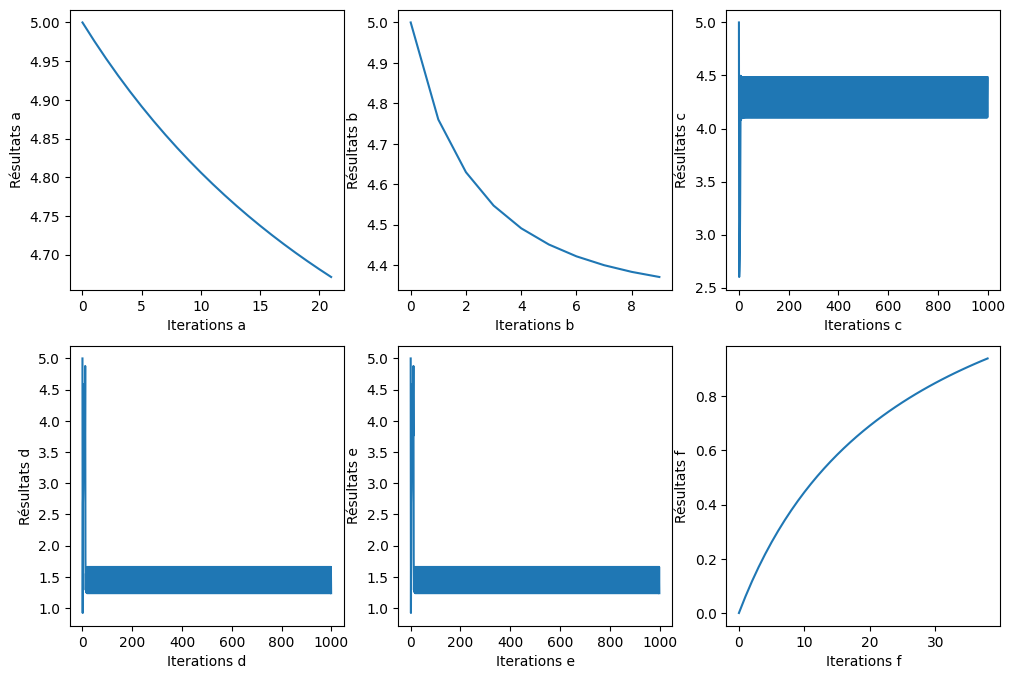

In [57]:
# 5. Visualisez l’évolution des minimums de la fonction E(x) trouvés au cours des itérations.

fig, axes = plt.subplots(2, 3,figsize=(12, 8))
ax1 =axes[0,0]; ax2 =axes[0,1];ax3=axes[0,2]
ax4 =axes[1,0];ax5=axes[1,1];ax6=axes[1,2]
ax1.plot(result_a)
ax1.set_xlabel('Iterations a')
ax1.set_ylabel('Résultats a')

ax2.plot(result_b)
ax2.set_xlabel('Iterations b')
ax2.set_ylabel('Résultats b')

ax3.plot(result_c)
ax3.set_xlabel('Iterations c')
ax3.set_ylabel('Résultats c')

ax4.plot(result_d)
ax4.set_xlabel('Iterations d')
ax4.set_ylabel('Résultats d')

ax5.plot(result_e)
ax5.set_xlabel('Iterations e')
ax5.set_ylabel('Résultats e')

ax6.plot(result_f)
ax6.set_xlabel('Iterations f')
ax6.set_ylabel('Résultats f')

plt.show()

In [58]:
#6. Testez votre algorithme avec d’autres valeurs de  et nombremax.


Nombre d'itérations : 20

Valeur de E(x) au minimum : 4.330327905610853

Valeur de E'(xmin)  : 0.08420386746803388


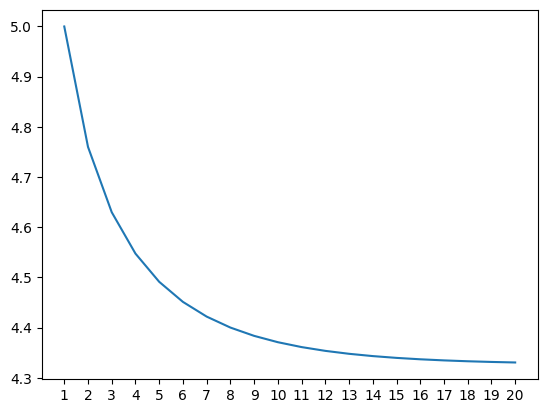

In [59]:
#(b) x0 = 5 et η = 0.01
learning_rate = 0.01
max_iterations = 2000
tolerance = 0.001
x0 = 5

result_autre,erreurs_autre = gradient_descente(learning_rate, max_iterations, tolerance,x0)

# Imprimer les résultats
#print("Valeurs de x après la descente de gradient :", result)
print("\nNombre d'itérations :", len(result_autre))
#print("\nles erreurs :",erreurs_b)

print("\nValeur de E(x) au minimum :",  result_autre[-1])
print("\nValeur de E'(xmin)  :",  deriv_E(result_autre[-1]))

plt.plot(list(range(1, len(result_autre) + 1)),result_autre)
plt.xticks(list(range(1, len(result_autre) + 1)))
plt.show()

In [ ]:
#Descente de gradient pour la régression linéaire

In [14]:
#1. Calculez les dérivées partielles de la fonction E(a, b) selon a et b
"""
on remplace ˆyi par ax+b et on calcule les derivées partielles
/a
∂E/∂a = Σ(i=1 à n) 2(ˆyi - yi) * (∂ˆyi/∂a)
∂E/∂a = Σ(i=1 à n) 2(ˆyi - yi) * xi

/b
∂E/∂b = Σ(i=1 à n) 2(ˆyi - yi) * (∂ˆyi/∂b)
∂E/∂b = Σ(i=1 à n) 2(ˆyi - yi)
"""
def derivPartialA(x,y,a,b):
    partial_a = 0
    for i in range(len(y)):
        partial_a += 2 * ((a*x[i] +b) -y[i]) * x[i]
    return partial_a
    
def derivPartialB(x,y,a,b):
    partial_b =0
    for i in range(len(y)) :
        partial_b += 2 * ((a*x[i] +b) -y[i]) 
    return partial_b

def erreurs(x,y,a,b) :
    total_errors = 0
    for i in range(len(y)) :
        total_errors += ((a*x[i] +b) -y[i])**2
    return total_errors
    

In [67]:
#2-Implémentez l’algorithme DG sous Python pour la fonction E(a, b). NB : Pour le cas avec deux dimensions, les règles de mis à jour de la DG deviennent :

def gradientDescenteLineaire(x,y,max_iterations,learning_rate,seuil_err):
    coeff = [(0,0)]
    errors = []
    it = 0
    while it< max_iterations-1:
        a = coeff[it][0] - learning_rate * derivPartialA(x,y,coeff[it][0],coeff[it][1])
        b = coeff[it][1] - learning_rate * derivPartialB(x,y,coeff[it][0],coeff[it][1])
        coeff.append((a,b))
        
        # calcules de l'erreur
        err = erreurs(x,y,a,b)
        errors.append(err)
        if err <= seuil_err :
            break;
        it += 1
        
    return coeff,errors

In [68]:
# 3. Importez la fonction datasets.make_regression et utilisez la pour générez un problème de régression aléatoire de 100 example avec une seule variable.

np.random.seed(10)
X, y = make_regression(n_samples=100, n_features=1)


Nombre d'itérations : 41

Valeur du minimum : (29.963999275794244, 0.004676246667940698)


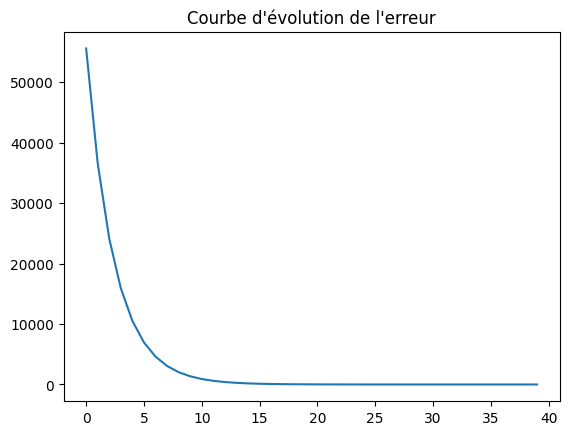

In [69]:
# test: (a) η = 0.001, nombremax = 100
coefficient,errors =gradientDescenteLineaire(X[:, 0],y,100,0.001,0.01)

# Imprimer les résultats
print("\nNombre d'itérations :", len(coefficient))
#print("\nles erreurs :",erreurs_b)

print("\nValeur du minimum :",  coefficient[-1])

plt.plot(errors)
plt.title("Courbe d'évolution de l'erreur")
plt.show()


Nombre d'itérations : 41

Valeur du minimum : (29.963999275794244, 0.004676246667940698)


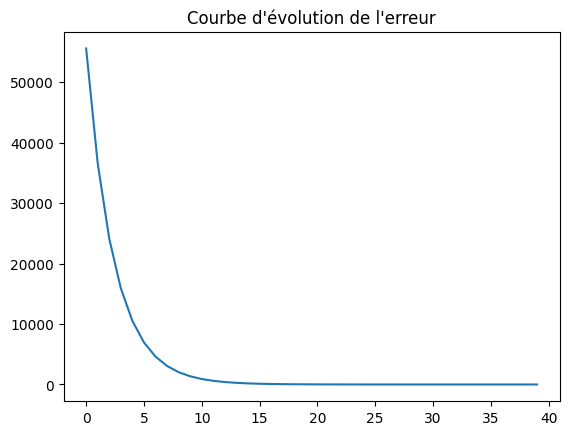

In [70]:
# test: (b) η = 0.001, nombremax = 500
coefficient,errors =gradientDescenteLineaire(X[:, 0],y,500,0.001,0.01)

# Imprimer les résultats
print("\nNombre d'itérations :", len(coefficient))
#print("\nles erreurs :",erreurs_b)

print("\nValeur du minimum :",  coefficient[-1])

plt.plot(errors)
plt.title("Courbe d'évolution de l'erreur")
plt.show()


Nombre d'itérations : 41

Valeur du minimum : (29.963999275794244, 0.004676246667940698)


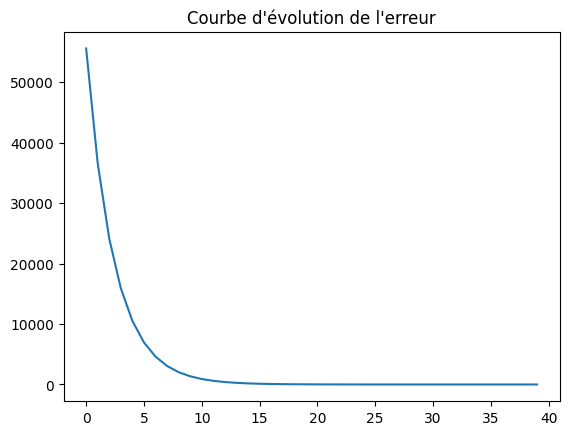

In [71]:
# test: (c) η = 0.001, nombremax = 1000
coefficient,errors =gradientDescenteLineaire(X[:, 0],y,1000,0.001,0.01)

# Imprimer les résultats
print("\nNombre d'itérations :", len(coefficient))
#print("\nles erreurs :",erreurs_b)

print("\nValeur du minimum :",  coefficient[-1])

plt.plot(errors)
plt.title("Courbe d'évolution de l'erreur")
plt.show()


Nombre d'itérations : 1000

Valeur du minimum : (3.635107156180219e+46, 5.213524824367328e+46)


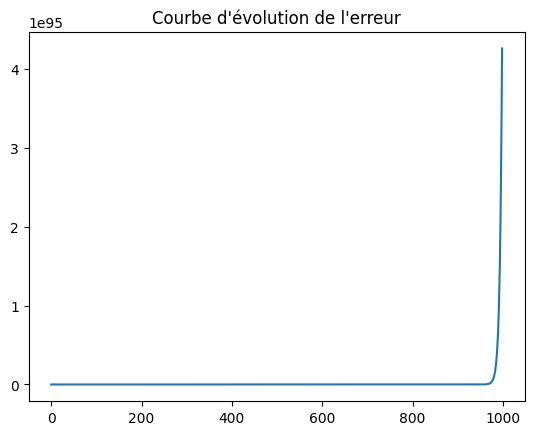

In [73]:
# test: (d) η = 0.01, nombremax = 1000
coefficient,errors =gradientDescenteLineaire(X[:, 0],y,1000,0.01,0.01)

# Imprimer les résultats
print("\nNombre d'itérations :", len(coefficient))
#print("\nles erreurs :",erreurs_b)

print("\nValeur du minimum :",  coefficient[-1])

plt.plot(errors)
plt.title("Courbe d'évolution de l'erreur")
plt.show()

C:\Users\kafan\AppData\Local\Temp\ipykernel_17784\2168630053.py:27: RuntimeWarning: overflow encountered in double_scalars
  total_errors += ((a*x[i] +b) -y[i])**2
C:\Users\kafan\AppData\Local\Temp\ipykernel_17784\2168630053.py:15: RuntimeWarning: overflow encountered in double_scalars
  partial_a += 2 * ((a*x[i] +b) -y[i]) * x[i]
C:\Users\kafan\AppData\Local\Temp\ipykernel_17784\2168630053.py:21: RuntimeWarning: overflow encountered in double_scalars
  partial_b += 2 * ((a*x[i] +b) -y[i])
C:\Users\kafan\AppData\Local\Temp\ipykernel_17784\2168630053.py:27: RuntimeWarning: invalid value encountered in double_scalars
  total_errors += ((a*x[i] +b) -y[i])**2
C:\Users\kafan\AppData\Local\Temp\ipykernel_17784\2168630053.py:15: RuntimeWarning: invalid value encountered in double_scalars
  partial_a += 2 * ((a*x[i] +b) -y[i]) * x[i]
C:\Users\kafan\AppData\Local\Temp\ipykernel_17784\2168630053.py:21: RuntimeWarning: invalid value encountered in double_scalars
  partial_b += 2 * ((a*x[i] +b) -y


Nombre d'itérations : 1000

Valeur du minimum : (nan, nan)


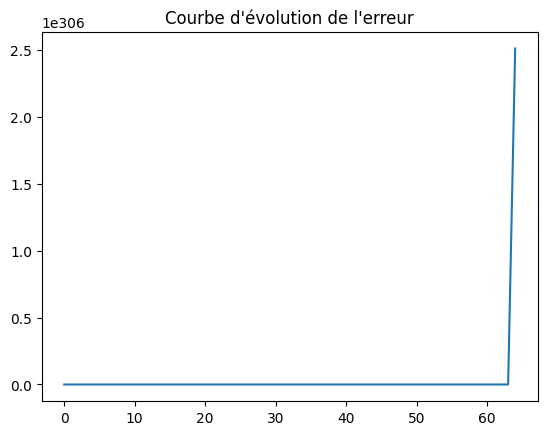

In [74]:
# test: (e) η = 1, nombremax = 1000
coefficient,errors =gradientDescenteLineaire(X[:, 0],y,1000,1,0.01)

# Imprimer les résultats
print("\nNombre d'itérations :", len(coefficient))
#print("\nles erreurs :",erreurs_b)

print("\nValeur du minimum :",  coefficient[-1])

plt.plot(errors)
plt.title("Courbe d'évolution de l'erreur")
plt.show()

In [ ]:
# Affichez les coefficients trouvés, ainsi que la valeur de E(amin, bmin) et le nombre d’itérations. Que constatez-vous ?
"""
Le nombre d'iterations des 3 premiers est 41 inferieurs aux nombres maximum, donc la fonction de cout atteint la convergence avant
le maximum. dans les 2 derniers on bien que l'erreur augmente avec le temps et la atteint le maximum d'iterations sans arretés. Les hyperparamètres ne sont pas 
bonnes. le learning rate est trop grand.
"""

In [77]:
#Importez la fonction stats.linregress de scipy. Utilisez cette fonction pour résoudre le même problème. Comparez les résultats obtenus. Que constatez-vous

slope, intercept, r_value, p_value, std_err = stats.linregress(X[:, 0], y)
print("Résultat scipy:")
print(slope, intercept)

Résultat scipy:
29.972987242456288 -4.440892098500626e-16


In [80]:
"""
Les résultats de mes trois premiers tests sont simulaires aux résultats de la fonction stats.linregress de scipy.
"""
print("Moi:", (29.963999275794244, 0.004676246667940698))
print("stats.linregress :",(29.972987242456288 -4.440892098500626e-16))

Moi: (29.963999275794244, 0.004676246667940698)
stats.linregress : 29.972987242456288


In [ ]:
# 6. Visualisez le jeu de données généré avec les fonctions approximatives obtenues en utilisant les deux méthodes.

In [96]:
x_values = X[:, 0]
slope_me = 29.963999275794244
intercept_me = 0.004676246667940698
slope = 29.972987242456288
intercept = -4.440892098500626e-16
y_pred_me  =  slope_me * x_values + intercept_me
y_pred_stats = slope * x_values + intercept

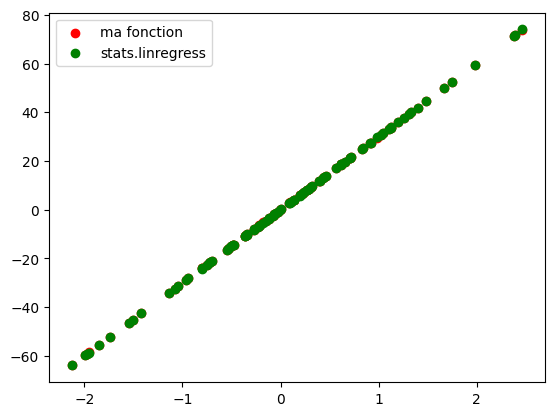

In [97]:
plt.scatter(x_values, y_pred_me,color='red',label="ma fonction")
plt.scatter(x_values, y_pred_stats,color='green',label="stats.linregress")
plt.legend()
plt.show()